# About

Trere are swvwral regression which can be used for tracks fitting.

In [1]:
import os, sys
sys.path.append('../functions')

In [2]:
% matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

#Reading data

In [3]:
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


#Get Event

In [4]:
from Y_views import *
event_id = 1242#27 # 4.3
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis_1_2(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
51113,51113,11.585799,112.939369,2582.248291,3,384.003082,1,0,0,1,221,0.299376,1242,0,112.6286,2582.25
51148,51148,34.715237,190.350983,2582.225586,2,384.173859,1,0,0,1,177,0.272079,1242,35,190.0686,2582.25
51114,51114,11.585479,112.947327,2583.750732,3,384.050385,1,0,1,0,220,0.132678,1242,1,113.0686,2583.75
51149,51149,34.749966,190.488312,2583.752930,2,384.222351,1,0,1,0,176,0.031822,1242,36,190.5086,2583.75
51119,51119,11.579594,113.091599,2611.152344,3,384.972321,1,3,0,0,220,0.428407,1242,6,113.5086,2611.15
51154,51154,35.373371,192.966141,2611.127686,2,385.143005,1,3,0,0,175,0.247164,1242,41,192.7086,2611.15
51120,51120,11.579348,113.097343,2612.247559,3,385.010986,1,3,0,1,221,0.457352,1242,7,112.6286,2612.25
51121,51121,11.579010,113.105225,2613.749756,3,385.050476,1,3,1,0,220,0.025228,1242,8,113.0686,2613.75
51155,51155,35.457409,193.303848,2614.836914,2,385.265930,1,3,1,1,175,0.144446,1242,42,193.1486,2614.85
51122,51122,11.542076,113.940338,2781.147949,3,390.642365,2,0,0,0,220,0.420341,1242,9,113.5086,2781.15


#Get Track

In [5]:
ind = [37413, 37414, 37420, 37421, 37384, 37385, 37390, 37391]

In [6]:
track = event[event.Wy > -48]#[event.TrackID == 3]
track = event[event.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
51148,51148,34.715237,190.350983,2582.225586,2,384.173859,1,0,0,1,177,0.272079,1242,35,190.0686,2582.25
51149,51149,34.749966,190.488312,2583.752930,2,384.222351,1,0,1,0,176,0.031822,1242,36,190.5086,2583.75
51154,51154,35.373371,192.966141,2611.127686,2,385.143005,1,3,0,0,175,0.247164,1242,41,192.7086,2611.15
51155,51155,35.457409,193.303848,2614.836914,2,385.265930,1,3,1,1,175,0.144446,1242,42,193.1486,2614.85
51156,51156,39.269848,209.281815,2782.266113,2,390.886017,2,0,0,1,166,0.158997,1242,43,209.4286,2782.25
51157,51157,39.304722,209.436691,2783.794922,2,390.946136,2,0,1,0,165,0.445585,1242,44,209.8686,2783.75
51162,51162,39.926357,212.242752,2811.133057,2,391.855682,2,3,0,0,164,0.163634,1242,49,212.0686,2811.15
51163,51163,40.010296,212.628540,2814.838623,2,391.979645,2,3,1,1,164,0.109135,1242,50,212.5086,2814.85


In [7]:
from MarginLinearRegression import *
qlr = QuasiLinearRegression()

Wz = track.Z.values.reshape(-1, 1)
Wy = track.Y.values.reshape(-1, 1)
R = track.dist2Wire.values.reshape(-1, 1)

qlr.fit(Wz, Wy, a=0.0002)

In [8]:
qlr.k

matrix([[  1.64564923e+02],
        [ -6.85843457e-02],
        [  3.04294339e-05]])

In [9]:
qlr.slope(Wz).mean()

0.095612695801353148

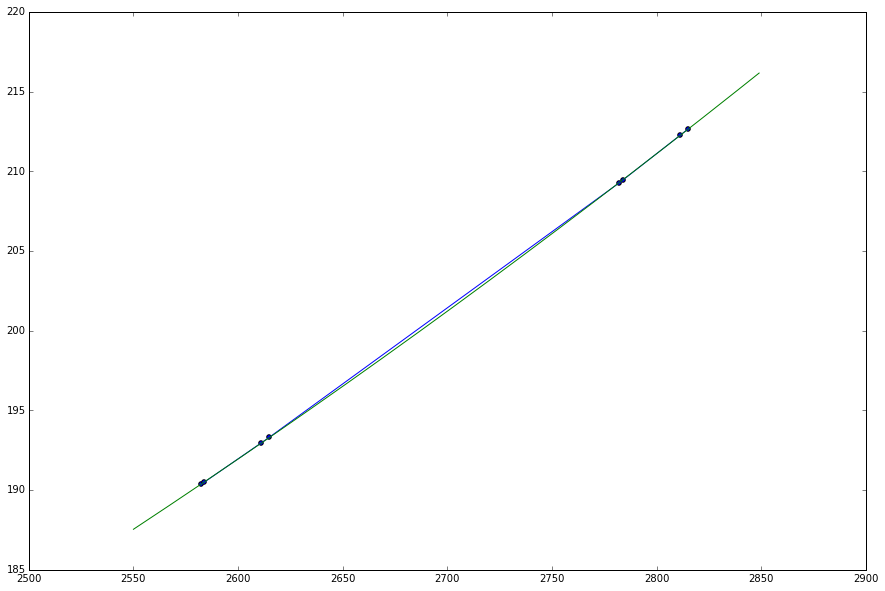

In [10]:
x = numpy.array(range(2550, 2850)).reshape(-1, 1)

fig = plt.figure(figsize=(15,10))
plt.scatter(Wz, Wy)
plt.plot(Wz, Wy)
plt.plot(x, qlr.predict(x))
plt.show()

In [11]:
a = (Wy - qlr.predict(Wz)) * (Wy - qlr.predict(Wz))

In [12]:
b = a.mean()
numpy.sqrt(b)

0.015246776651214803

In [13]:
from MarginLinearRegression import *
mlr = MarginLinearRegression(n_iter=2)

Wz = track.Wz.values.reshape(-1, 1)
Wy = track.Wy.values.reshape(-1, 1)
R = track.dist2Wire.values.reshape(-1, 1)

score, lr = mlr.fit(Wz, Wy, R, R, a=0.0002)

In [14]:
score

0.015249118344935588

In [15]:
lr.k

matrix([[  1.64549580e+02],
        [ -6.85814031e-02],
        [  3.04288860e-05]])

In [16]:
import cPickle as pickle

clf_pickle2 = open('classifier.pkl', 'rb')
clf = pickle.load(clf_pickle2)
clf_pickle2.close()

In [26]:
from MarginLinearRegression import *
rmlr = RobustMarginLinearRegression(n_iter=2)
score, lr, tr = rmlr.turbo_fit(track, clf, a=0.2)

In [27]:
score

0.079552087205925576

In [28]:
lr.k

matrix([[-55.8192968 ],
        [  0.09529954],
        [  0.        ]])

In [29]:
tr

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
51148,51148,34.715237,190.350983,2582.225586,2,384.173859,1,0,0,1,177,0.272079,1242,35,190.0686,2582.25
51149,51149,34.749966,190.488312,2583.752930,2,384.222351,1,0,1,0,176,0.031822,1242,36,190.5086,2583.75
51154,51154,35.373371,192.966141,2611.127686,2,385.143005,1,3,0,0,175,0.247164,1242,41,192.7086,2611.15
51155,51155,35.457409,193.303848,2614.836914,2,385.265930,1,3,1,1,175,0.144446,1242,42,193.1486,2614.85
51156,51156,39.269848,209.281815,2782.266113,2,390.886017,2,0,0,1,166,0.158997,1242,43,209.4286,2782.25
51157,51157,39.304722,209.436691,2783.794922,2,390.946136,2,0,1,0,165,0.445585,1242,44,209.8686,2783.75
51162,51162,39.926357,212.242752,2811.133057,2,391.855682,2,3,0,0,164,0.163634,1242,49,212.0686,2811.15
51163,51163,40.010296,212.628540,2814.838623,2,391.979645,2,3,1,1,164,0.109135,1242,50,212.5086,2814.85


In [30]:
rmlr.dist2track(track)

array([[ 0.01386665],
       [ 0.01190624],
       [ 0.01568464],
       [ 0.01788316],
       [ 0.01652438],
       [ 0.01570012],
       [ 0.01192673],
       [ 0.01762038]])

In [31]:
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
51148,51148,34.715237,190.350983,2582.225586,2,384.173859,1,0,0,1,177,0.272079,1242,35,190.0686,2582.25
51149,51149,34.749966,190.488312,2583.752930,2,384.222351,1,0,1,0,176,0.031822,1242,36,190.5086,2583.75
51154,51154,35.373371,192.966141,2611.127686,2,385.143005,1,3,0,0,175,0.247164,1242,41,192.7086,2611.15
51155,51155,35.457409,193.303848,2614.836914,2,385.265930,1,3,1,1,175,0.144446,1242,42,193.1486,2614.85
51156,51156,39.269848,209.281815,2782.266113,2,390.886017,2,0,0,1,166,0.158997,1242,43,209.4286,2782.25
51157,51157,39.304722,209.436691,2783.794922,2,390.946136,2,0,1,0,165,0.445585,1242,44,209.8686,2783.75
51162,51162,39.926357,212.242752,2811.133057,2,391.855682,2,3,0,0,164,0.163634,1242,49,212.0686,2811.15
51163,51163,40.010296,212.628540,2814.838623,2,391.979645,2,3,1,1,164,0.109135,1242,50,212.5086,2814.85


In [49]:
score, lr = rmlr.fit(track, a=0.0002)

In [50]:
score

0.0015662440028758112

In [51]:
rmlr.dist2track(track)

array([[ 0.00140214],
       [ 0.33457854],
       [ 0.0018715 ],
       [ 0.11290963],
       [ 0.00168957],
       [ 0.12765039],
       [ 0.12389249],
       [ 0.01636178],
       [ 0.00122042]])

#Regressions

In [19]:
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor
from MarginLinearRegression import *

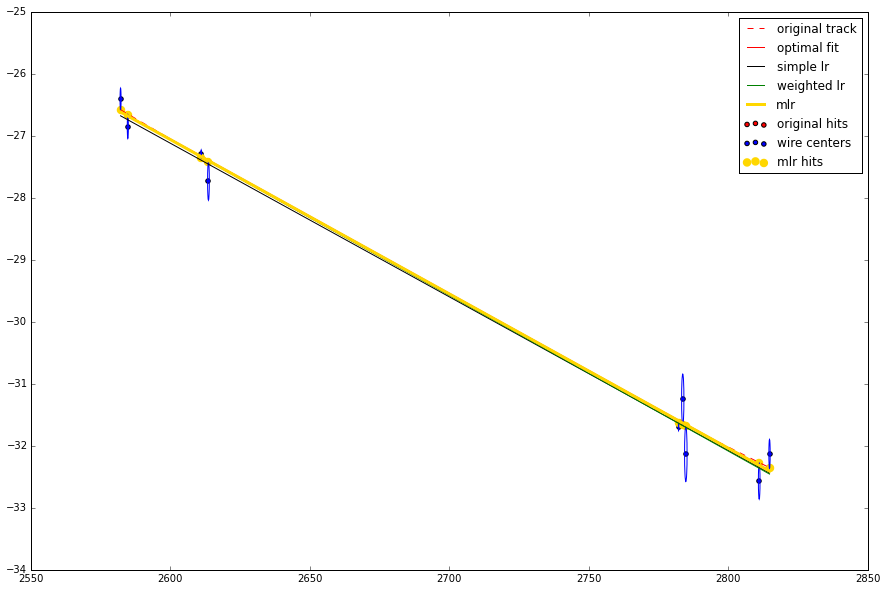

In [41]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=2)
score = mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')



plt.legend(loc='best')
plt.show()

In [8]:
score

0.18000213894549433

In [8]:
# event
event_id = 4 # 4.3
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis(event)

# track
track = event[event.TrackID == 3]

# plots
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=2)
mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')



plt.legend(loc='best')
plt.show()

NameError: name 'modify_for_yz_analysis' is not defined

#Bad track

In [8]:
from Y_views import *
event_id = 2
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
79,79,73.361366,0.837755,2581.149902,2,383.880371,1,0,0,0,284,0.042245,2,38,0.8686,2581.15
41,41,64.405243,3.918991,2582.247559,3,383.923828,1,0,0,1,283,0.398998,2,0,3.5086,2582.25
42,42,64.391327,3.927866,2583.750244,3,383.967041,1,0,1,0,282,0.032134,2,1,3.9486,2583.75
80,80,73.391182,0.832995,2583.750732,2,383.973724,1,0,1,0,284,0.392995,2,39,0.4286,2583.75
48,48,64.137390,4.091341,2611.151855,3,384.884766,1,3,0,0,282,0.308665,2,7,4.3886,2611.15
85,85,73.705360,0.782221,2611.149902,2,384.881409,1,3,0,0,284,0.097779,2,44,0.8686,2611.15
49,49,64.113304,4.106993,2613.749023,3,384.968506,1,3,1,0,282,0.146996,2,8,3.9486,2613.75
86,86,73.735184,0.777356,2613.750732,2,384.972351,1,3,1,0,284,0.337356,2,45,0.4286,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
50,50,62.551594,5.195495,2782.250488,3,390.588989,2,0,0,1,282,0.084507,2,9,5.2686,2782.25


In [9]:
track1 = event[(event.TrackID == 3) * (event.StatNb == 1)]
track2 = event[(event.TrackID == 2) * (event.StatNb == 2)]
track = pandas.concat([track1, track2], axis=0)
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
41,41,64.405243,3.918991,2582.247559,3,383.923828,1,0,0,1,283,0.398998,2,0,3.5086,2582.25
42,42,64.391327,3.927866,2583.750244,3,383.967041,1,0,1,0,282,0.032134,2,1,3.9486,2583.75
48,48,64.137390,4.091341,2611.151855,3,384.884766,1,3,0,0,282,0.308665,2,7,4.3886,2611.15
49,49,64.113304,4.106993,2613.749023,3,384.968506,1,3,1,0,282,0.146996,2,8,3.9486,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
88,88,75.667488,0.437574,2782.250977,2,390.597870,2,0,0,1,285,0.437575,2,47,-0.0114,2782.25
89,89,75.684669,0.434236,2783.750000,2,390.638794,2,0,1,0,284,0.005764,2,48,0.4286,2783.75
96,96,76.011482,0.369193,2812.250732,2,391.595184,2,3,0,1,285,0.369194,2,55,-0.0114,2812.25
97,97,76.028702,0.365713,2813.749756,2,391.639740,2,3,1,0,284,0.074288,2,56,0.4286,2813.75


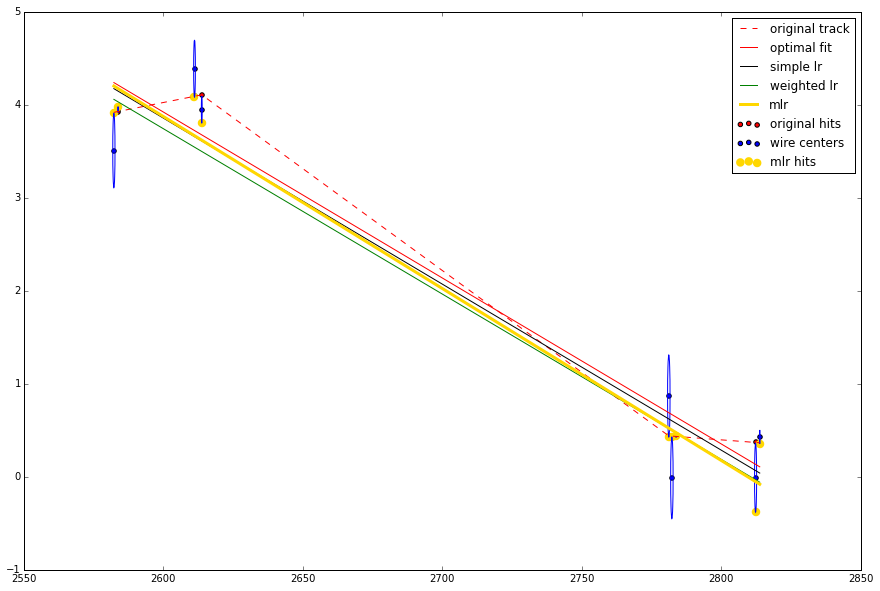

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=1)
mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')


plt.legend(loc='best')
plt.show()

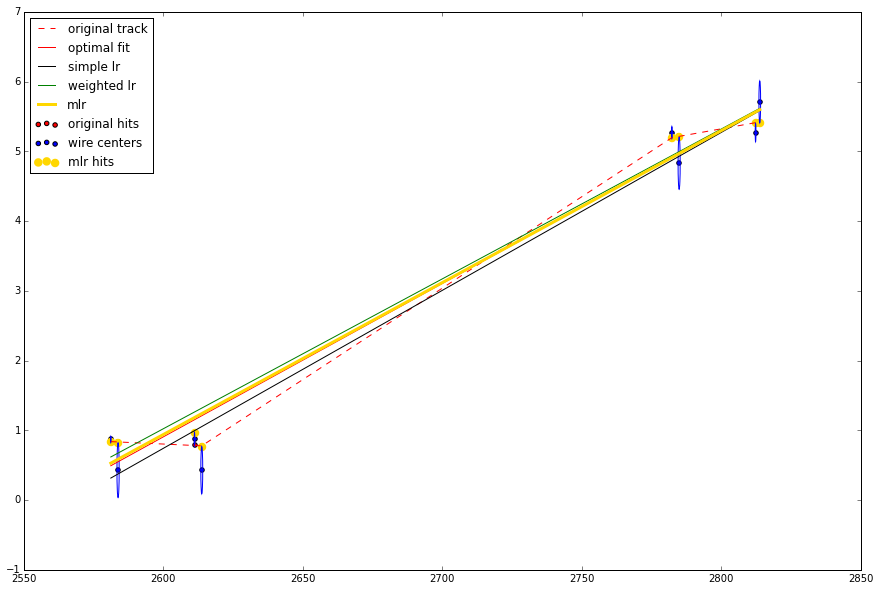

In [11]:
# event
event_id = 2
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis(event)

# track
track1 = event[(event.TrackID == 2) * (event.StatNb == 1)]
track2 = event[(event.TrackID == 3) * (event.StatNb == 2)]
track = pandas.concat([track1, track2], axis=0)

# plots
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=1)
mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')


plt.legend(loc='best')
plt.show()